In [6]:
directory = "txt_"

num_frame = 20
num_key = 126

In [7]:
# build model
from keras.models import Sequential
from keras.layers import LSTM, BatchNormalization, Dropout, Flatten, Dense
from keras.optimizers import Adamax
from keras.regularizers import L2

model = Sequential([
    LSTM(units=126,
         return_sequences=True,
         kernel_regularizer=L2(),
         input_shape=(num_frame,num_key)),
    BatchNormalization(),
    Dropout(.3),

    
    LSTM(units=63,
         return_sequences=True,
         kernel_regularizer=L2()),
    BatchNormalization(),
    Dropout(.3),

    
    LSTM(units=63,
         return_sequences=True,
         kernel_regularizer=L2()),
    BatchNormalization(),
    Dropout(.3),

    Flatten(),
    Dense(28,activation="softmax")
])

model.build()
model.summary()

d:\Anaconda\envs\test_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 20, 126)        │       127,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 20, 126)        │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 126)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 20, 63)         │        47,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 20, 63)         │           252 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20, 63)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 20, 63)         │        32,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20, 63)         │           252 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 20, 63)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1260)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │        35,308 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,712 (952.00 KB)

 Trainable params: 243,208 (950.03 KB)

 Non-trainable params: 504 (1.97 KB)

In [9]:
# load data from txt_
import os
import pandas as pd
import numpy as np

# total label = 28
X = []
y = []
file_list = os.listdir(directory)
for file in file_list:
    df = pd.read_csv(os.path.join(directory,file))
    dataset = df.iloc[1:,1:]
    label = int(file.split("_")[0])
    n_sample = len(dataset)
    for i in range(num_frame,n_sample):
        X.append(dataset[i-num_frame:i])
        y.append(label)

X = np.array(X)
y = np.array(y)
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X,y,test_size=0.4)

In [14]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch,lr):
    return lr*0.8**(epoch//5)
lr_scheduler = LearningRateScheduler(scheduler)
checkpoint = ModelCheckpoint(
    filepath="LSTM_126_63_63.keras",
    save_best_only=True
)

model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adamax(0.005))

In [15]:
history = model.fit(X,y,
                    epochs = 30,
                    validation_data = (X_test,y_test),
                    callbacks = [lr_scheduler,checkpoint])

Epoch 1/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.1432 - loss: 6.8782 - val_accuracy: 0.1168 - val_loss: 4.8993 - learning_rate: 0.0050
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4813 - loss: 3.2943 - val_accuracy: 0.0649 - val_loss: 4.4713 - learning_rate: 0.0050
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6979 - loss: 1.9942 - val_accuracy: 0.0610 - val_loss: 6.7150 - learning_rate: 0.0050
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7624 - loss: 1.5603 - val_accuracy: 0.1981 - val_loss: 5.0780 - learning_rate: 0.0050
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7868 - loss: 1.3179 - val_accuracy: 0.3366 - val_loss: 3.1666 - learning_rate: 0.0050
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8546 - loss: 1.0753 - val_accuracy: 0.3882 - val_loss: 3.3282 - learning_rate: 0.0040
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9037 - loss: 0

In [21]:
print(dict.keys(history.history))
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


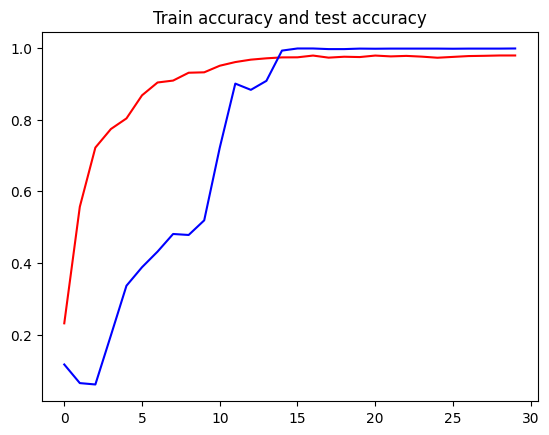

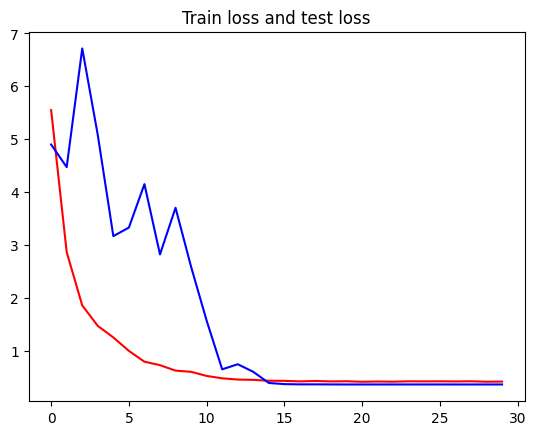

In [22]:
import matplotlib.pyplot as plt

plt.plot(acc,"r")
plt.plot(val_acc,"b")
plt.title("Train accuracy and test accuracy")
plt.show()

plt.plot(loss,"r")
plt.plot(val_loss,"b")
plt.title("Train loss and test loss")
plt.show()